# Loan Application Status Prediction

Problem Statement: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

<b>Independent Variables:</b>

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

<b>Dependent Variable (Target Variable):</b>

<b>Loan_Status</b>

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(('ignore'))
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE

ERROR: Could not find a version that satisfies the requirement scikit-pyplot
ERROR: No matching distribution found for scikit-pyplot


ERROR: Could not find a version that satisfies the requirement scikit-pyplot
ERROR: No matching distribution found for scikit-pyplot


In [3]:
data=pd.read_csv('loan_application.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values for categorical column, filling it by Mode and for continuous filling by Mean.

In [6]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [7]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [8]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [9]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [10]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [11]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [12]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

Dropping loan id because it is having all the unique values

In [13]:
data.drop('Loan_ID',axis=1,inplace=True)

In [14]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [16]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# EDA

Univariate Analysis

In [17]:
col=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

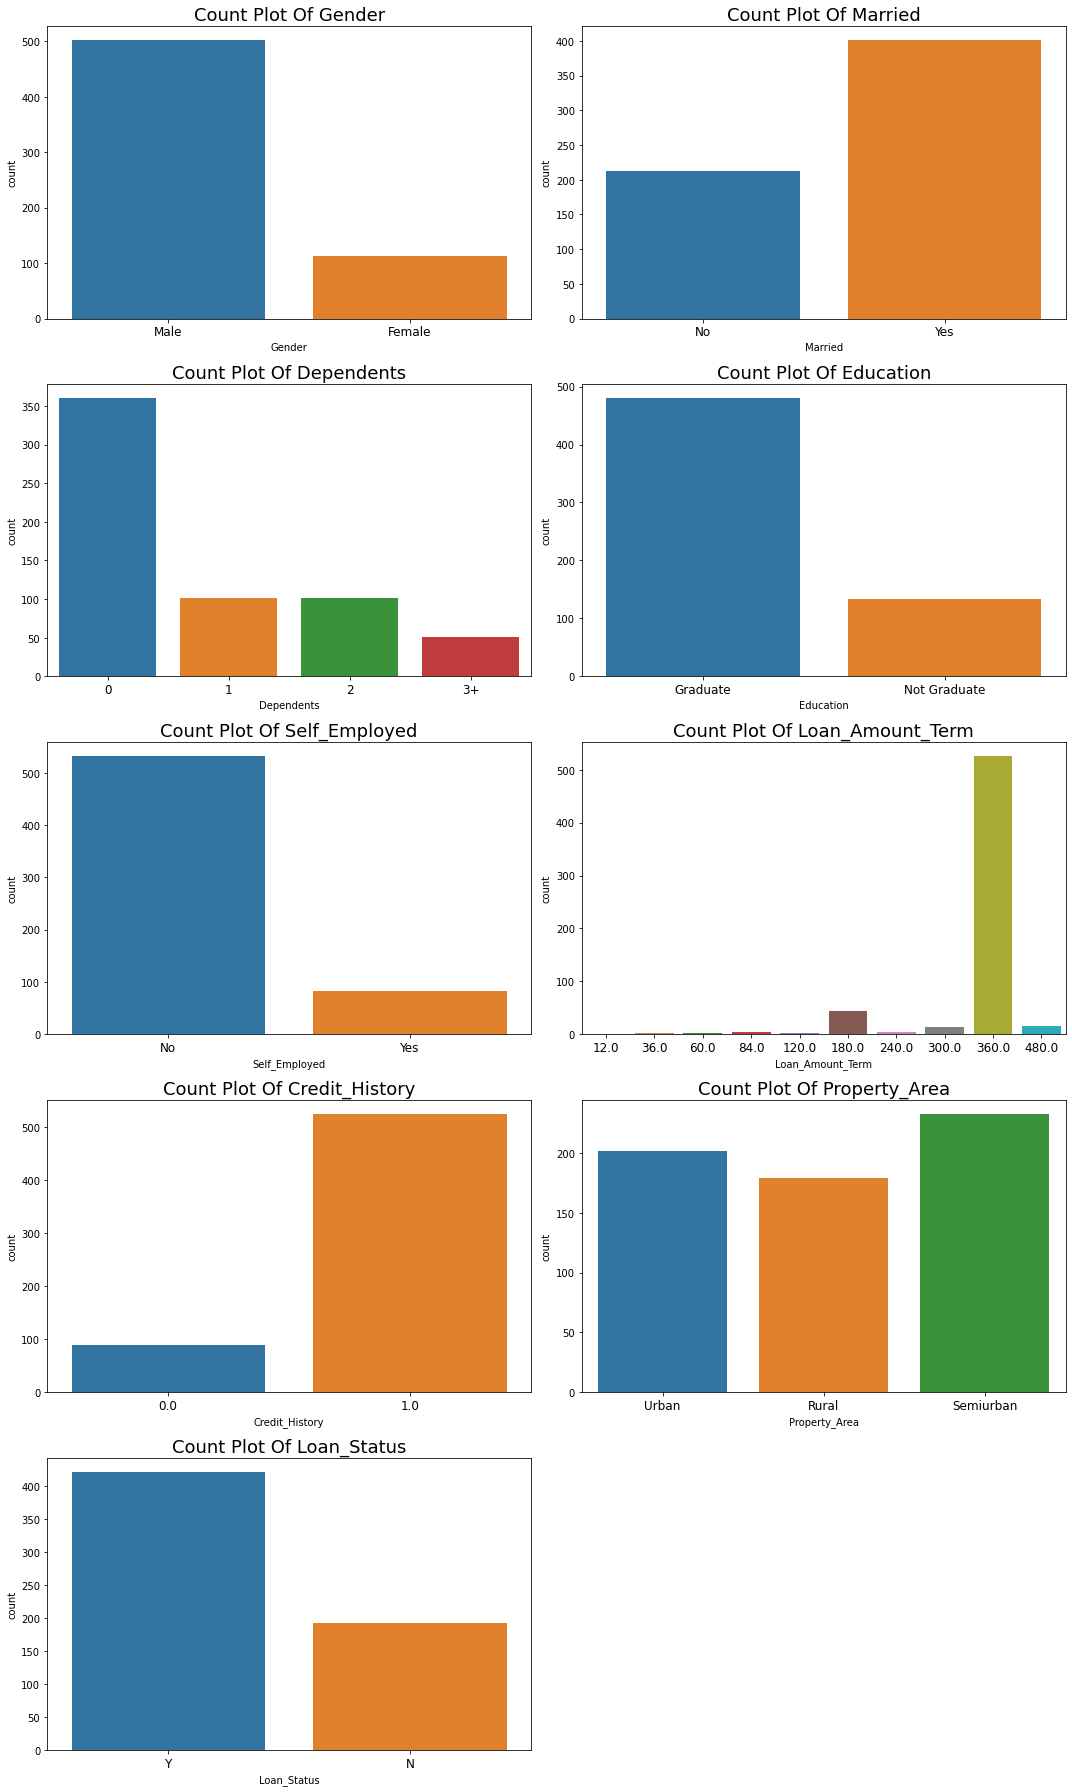

In [18]:
plt.figure(figsize=(15,25))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.countplot(data[col[i]])
    plt.title(f"Count Plot Of {col[i]}",fontsize=18)
    plt.xticks(fontsize=12)
    plt.tight_layout()  

# Observation

1. From Gender i can say The count of male is high and female has low count

2. From married countplot i can say people who are married are more as compare to single

3. From Countplot of dependents i can say 0 has high count and 3+ has the lowest count

4. From countplot of Education i can say people who are graduated are having more and people who are not graduated have less count

5. From Countplot of Self_employed i can say people who are not self employed have high count as compare to self employed people

6. From countplot of loan amount term 360 has the highest count and other has a very few count

7. Countplot of credit history where 1 has high count and 0 has less count

8. From Countplot of property area semiurban has the highest count and then Urban has the highest count and rural has least count

9. From COuntplot of loan status i can say Yes has the high count and N has the less count as compare to Yes

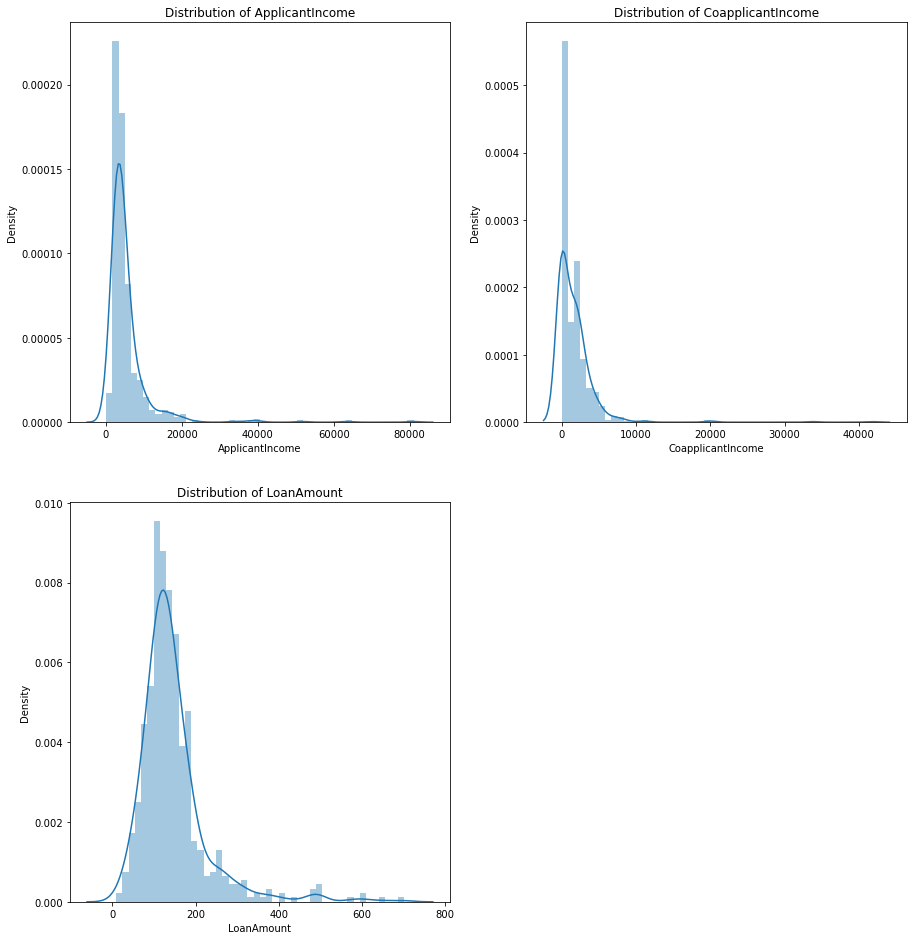

In [19]:
col2=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(15,25))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.distplot(data[col2[i]])
    plt.title(f"Distribution of {col2[i]}")

# Observation

1. From applicant income and CoapplicantIncome i can say both have left peak

2. From Loanamount i can say it is right skewed

# Bivariate Analysis

In [20]:
col3=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

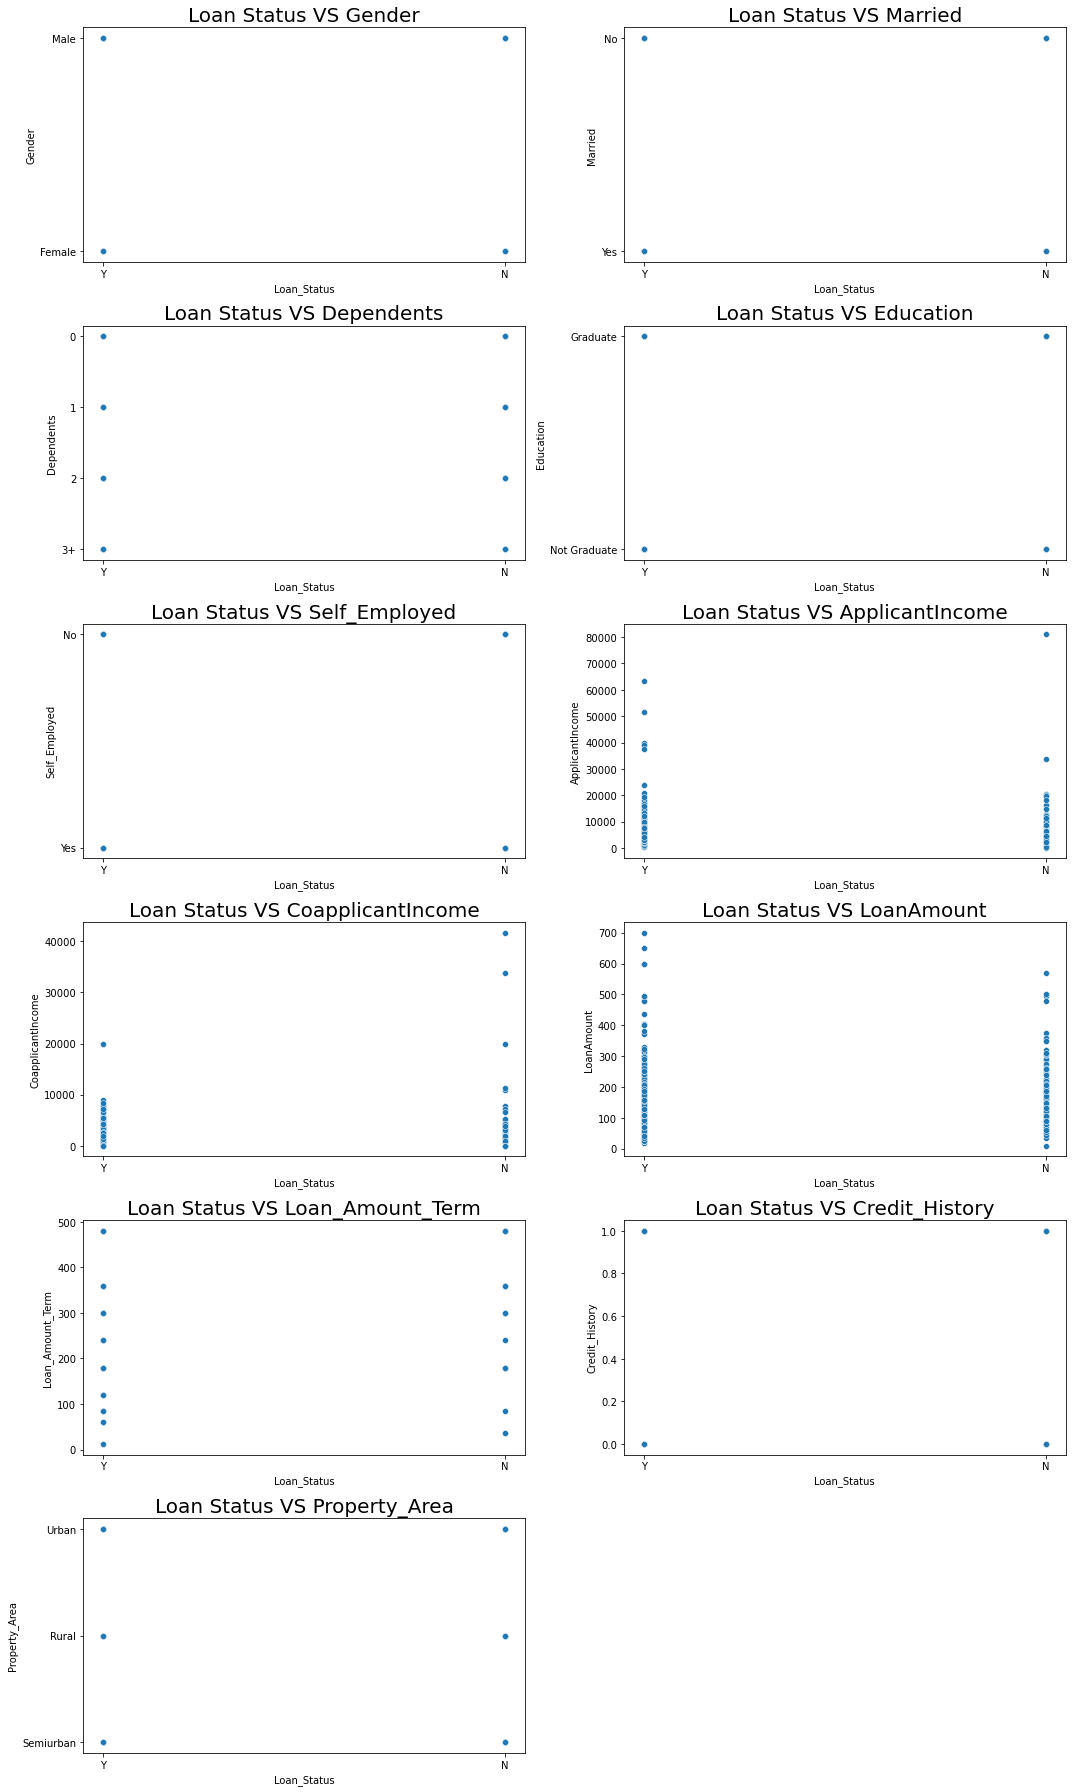

In [21]:
plt.figure(figsize=(15,25))
for i in range(len(col3)):
    plt.subplot(6,2,i+1)
    sns.scatterplot(x=data['Loan_Status'],y=data[col3[i]])
    plt.title(f"Loan Status VS {col3[i]}",fontsize=20)
    plt.tight_layout() 

# Observation

1-From applicantincome and loan status i can say more the income of peoples they take less lone and less the income of people they take loan

2-from coapplicantincome i can say more the people are they who dont want loan as compare to yes

3-From loanamount i can say people with loan status are high as compare to no loan

In [22]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [23]:
co=['ApplicantIncome','LoanAmount']

In [24]:
data0=data.groupby('Self_Employed')['LoanAmount'].count()
data0=data0.reset_index()
data0=data0.sort_values(by=('LoanAmount'),ascending=False)

In [25]:
data0

,Self_Employed,LoanAmount
0,No,532
1,Yes,82


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

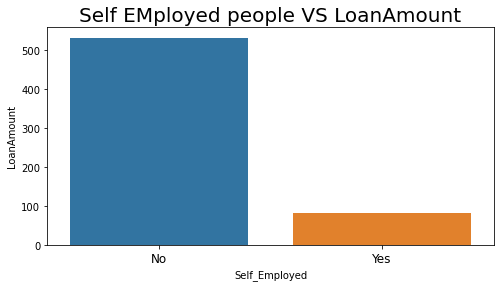

In [27]:
plt.figure(figsize=(8,4))
plt.title("Self EMployed people VS LoanAmount",fontsize=20)
sns.barplot(x='Self_Employed',y='LoanAmount',data=data0)
plt.xticks(fontsize=12)

From upper graph i can say people who are not self emplopyed take more loan amount.

In [28]:
data1=data.groupby('Loan_Amount_Term')['LoanAmount'].count()
data1=data1.reset_index()
data1=data1.sort_values(by=('LoanAmount'),ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '36.0'),
  Text(2, 0, '60.0'),
  Text(3, 0, '84.0'),
  Text(4, 0, '120.0'),
  Text(5, 0, '180.0'),
  Text(6, 0, '240.0'),
  Text(7, 0, '300.0'),
  Text(8, 0, '360.0'),
  Text(9, 0, '480.0')])

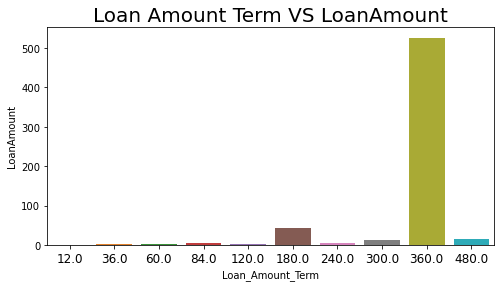

In [29]:
plt.figure(figsize=(8,4))
plt.title("Loan Amount Term VS LoanAmount",fontsize=20)
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=data1)
plt.xticks(fontsize=12)

# Observation

from upper observation i can say that the Loan Amount term of 360 has the highest loanamount count



In [30]:
data2=data.groupby('Property_Area')['LoanAmount'].count()
data2=data2.reset_index()

In [31]:
data2

,Property_Area,LoanAmount
0,Rural,179
1,Semiurban,233
2,Urban,202


Text(0.5, 1.0, 'AREA VS Loan Amount')

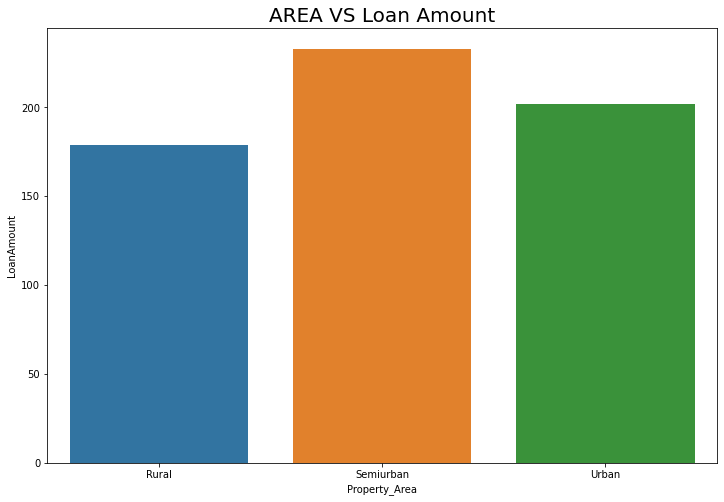

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='Property_Area',y='LoanAmount',data=data2)
plt.title("AREA VS Loan Amount",fontsize=20)

# Observation

From upper graph i can say that prople from semiurban take more loan and then urban people and then rural.

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:title={'center':'Loanamount VS CoapplicantIncome'}, xlabel='CoapplicantIncome', ylabel='LoanAmount'>

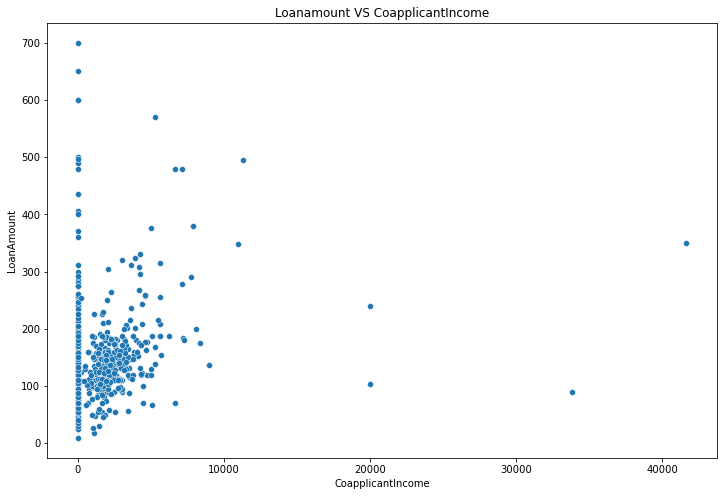

In [34]:
plt.figure(figsize=(12,8))
plt.title("Loanamount VS CoapplicantIncome")
sns.scatterplot(y='LoanAmount',x='CoapplicantIncome',data=data)

From upper plot i can say that people who have income between 0-10,000 took more loan and people who have income more then 10,000 took almost no loan

In [35]:
data3=data.groupby('Dependents')['LoanAmount'].apply(lambda x:x.mean())
data3=data3.reset_index()
data3=data3.sort_values(by=('LoanAmount'),ascending=False)

In [36]:
data4=data.groupby('Dependents')['CoapplicantIncome'].apply(lambda x:x.mean())
data4=data4.reset_index()
data4=data4.sort_values(by=('CoapplicantIncome'),ascending=False)

In [37]:
data5=data.groupby('Property_Area')['CoapplicantIncome'].apply(lambda x:x.mean())
data5=data5.reset_index()
data5=data5.sort_values(by=('CoapplicantIncome'),ascending=False)

In [38]:
data6=data.groupby('Property_Area')['LoanAmount'].apply(lambda x:x.mean())
data6=data6.reset_index()
data6=data6.sort_values(by=('LoanAmount'),ascending=False)

In [39]:
data7=data.groupby('Gender')['CoapplicantIncome'].apply(lambda x:x.mean())
data7=data7.reset_index()
data7=data7.sort_values(by=('Gender'),ascending=False)

In [40]:
data8=data.groupby('Gender')['LoanAmount'].apply(lambda x:x.mean())
data8=data8.reset_index()
data8=data8.sort_values(by=('Gender'),ascending=False)

In [41]:
data9=data.groupby('Married')['CoapplicantIncome'].apply(lambda x:x.mean())
data9=data9.reset_index()
data9=data9.sort_values(by=('Married'),ascending=False)

In [42]:
data10=data.groupby('Married')['LoanAmount'].apply(lambda x:x.mean())
data10=data10.reset_index()
data10=data10.sort_values(by=('Married'),ascending=False)

In [43]:
data11=data.groupby('Education')['CoapplicantIncome'].apply(lambda x:x.mean())
data11=data11.reset_index()
data11=data11.sort_values(by=('Education'),ascending=False)

In [44]:
data12=data.groupby('Education')['LoanAmount'].apply(lambda x:x.mean())
data12=data12.reset_index()
data12=data12.sort_values(by=('Education'),ascending=False)

In [45]:
data13=data.groupby('Self_Employed')['CoapplicantIncome'].apply(lambda x:x.mean())
data13=data13.reset_index()
data13=data13.sort_values(by=('Self_Employed'),ascending=False)

In [46]:
data14=data.groupby('Self_Employed')['LoanAmount'].apply(lambda x:x.mean())
data14=data14.reset_index()
data14=data14.sort_values(by=('Self_Employed'),ascending=False)

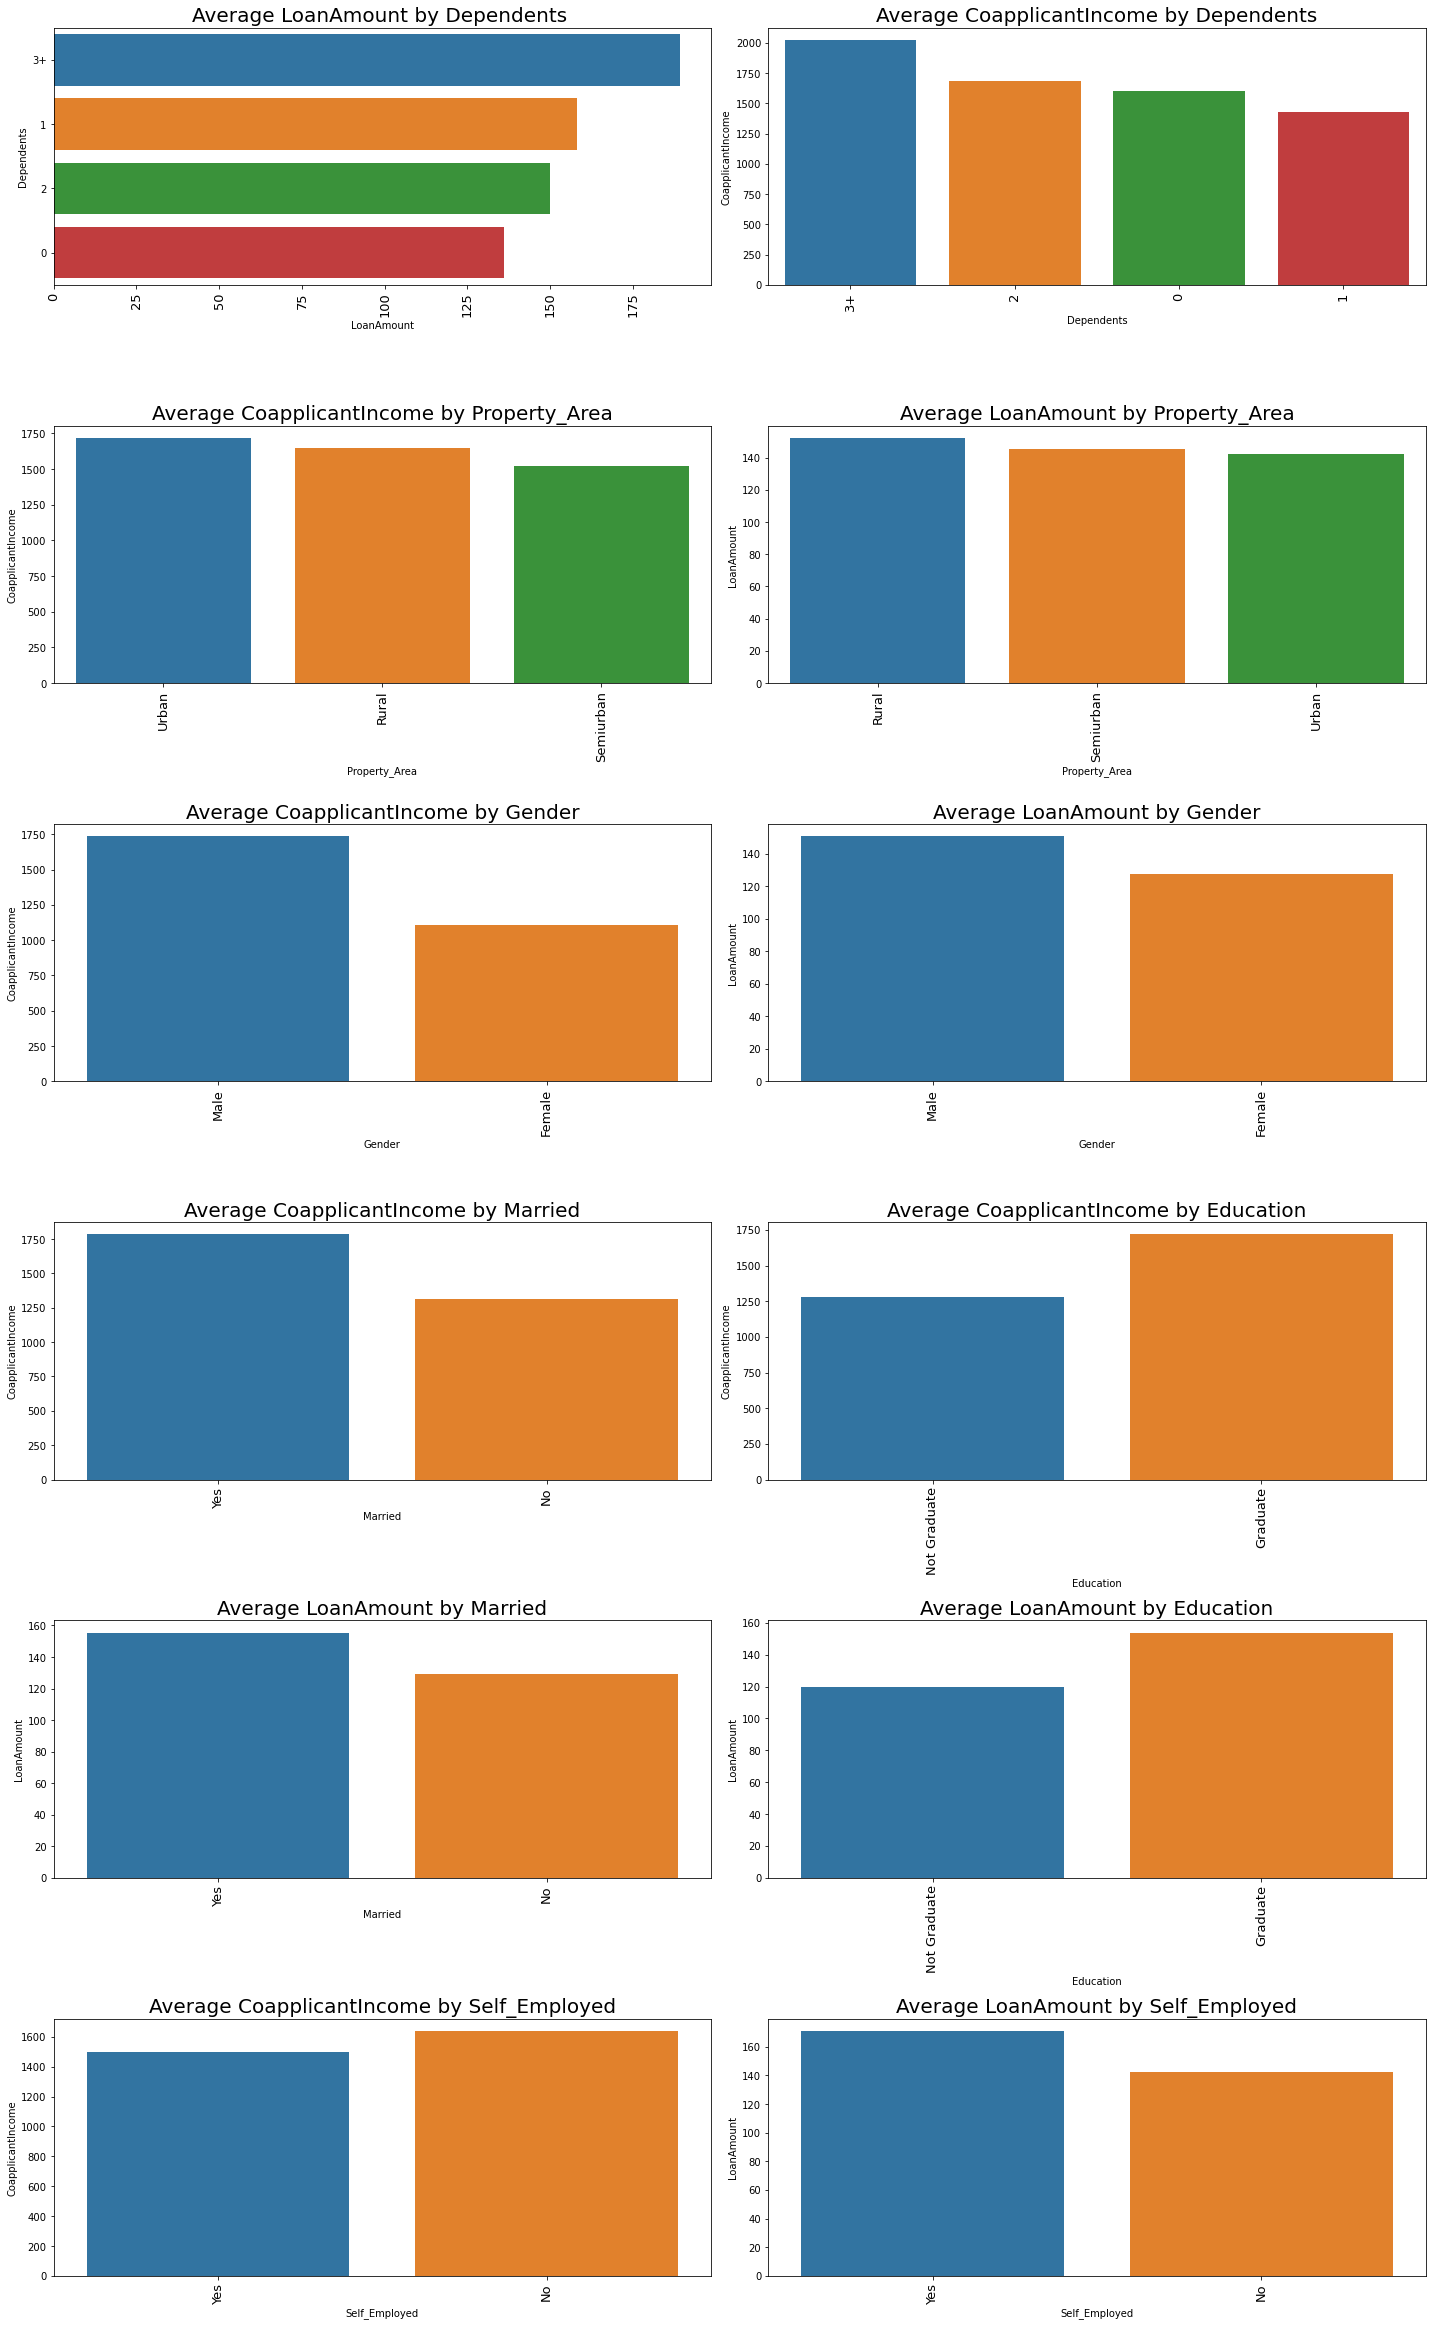

In [47]:
plt.figure(figsize=(20,65))
plt.subplot(12,2,1)
sns.barplot(y='Dependents',x='LoanAmount',data=data3.head(20))
plt.title("Average LoanAmount by Dependents ",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,2)
sns.barplot(x='Dependents',y='CoapplicantIncome',data=data4.head(20))
plt.title("Average CoapplicantIncome by Dependents",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,3)
sns.barplot(x='Property_Area',y='CoapplicantIncome',data=data5.head(20))
plt.title("Average CoapplicantIncome by Property_Area",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,4)
sns.barplot(x='Property_Area',y='LoanAmount',data=data6.head(20))
plt.title("Average LoanAmount by Property_Area",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,5)
sns.barplot(x='Gender',y='CoapplicantIncome',data=data7.head(20))
plt.title("Average CoapplicantIncome by Gender",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,6)
sns.barplot(x='Gender',y='LoanAmount',data=data8.head(20))
plt.title("Average LoanAmount by Gender",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,7)
sns.barplot(x='Married',y='CoapplicantIncome',data=data9.head(20))
plt.title("Average CoapplicantIncome by Married",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,8)
sns.barplot(x='Education',y='CoapplicantIncome',data=data11.head(20))
plt.title("Average CoapplicantIncome by Education",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,9)
sns.barplot(x='Married',y='LoanAmount',data=data10.head(20))
plt.title("Average LoanAmount by Married",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,10)
sns.barplot(x='Education',y='LoanAmount',data=data12.head(20))
plt.title("Average LoanAmount by Education",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,11)
sns.barplot(x='Self_Employed',y='CoapplicantIncome',data=data13.head(20))
plt.title("Average CoapplicantIncome by Self_Employed",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,12)
sns.barplot(x='Self_Employed',y='LoanAmount',data=data14.head(20))
plt.xticks(rotation=90,fontsize=13)
plt.title("Average LoanAmount by Self_Employed",fontsize=20)
plt.tight_layout()

# Obseravtion

From upper graph we can easily see the average value related to loanamount and coapplicantincome and applicanincome with all the features in dataset

In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [49]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [50]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
    df[column]=oe.fit_transform(df[column])
    return df

I am using ordianlencoder because all the columns have values in order

In [51]:
data=ordinal_transform(data,['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [52]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [53]:
data['Dependents']=data['Dependents'].replace({'3+':'3'})

In [54]:
data['Dependents']=data['Dependents'].astype(int)

In [55]:
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [56]:
x=X

In [57]:
X.dtypes

Gender               float64
Married              float64
Dependents             int32
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

# Checking Outliers

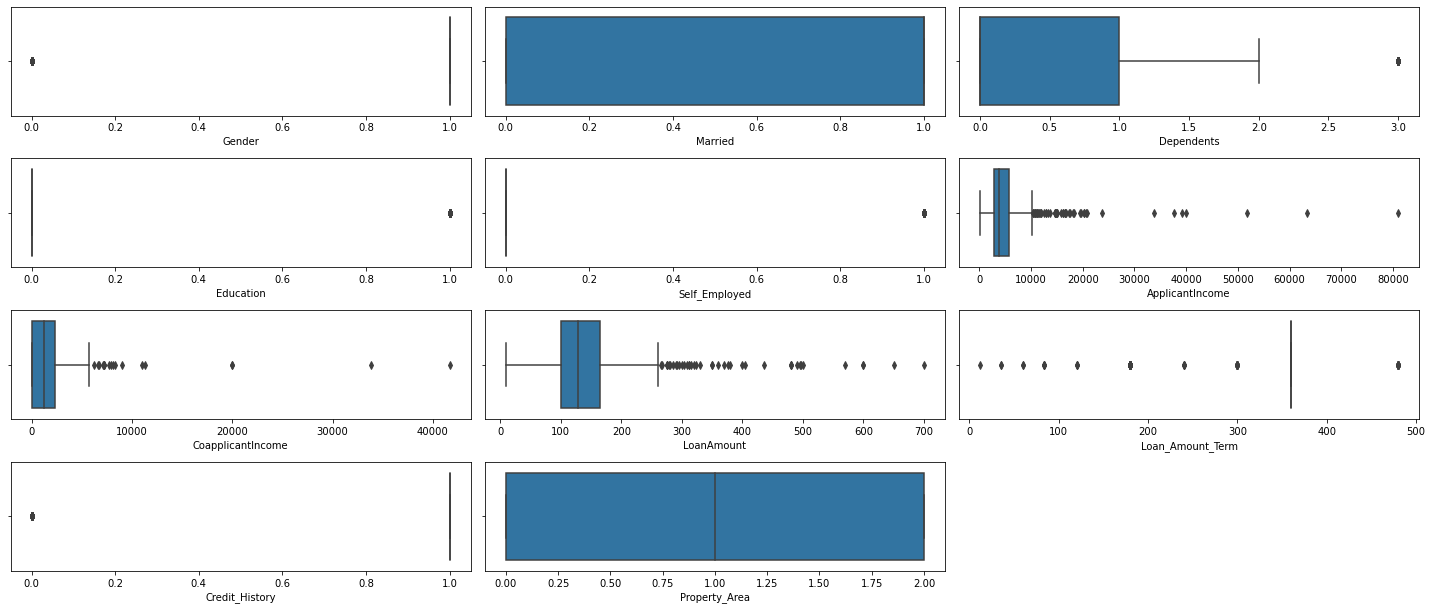

In [58]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
    plt.subplot(12,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

We have many outliers lets remove them

# Removing Outliers

In [59]:
for col in X.columns:
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col] <=percentile[0]]=percentile[0]
    X[col][X[col] >=percentile[1]]=percentile[1]

Using percentile method to remove outliers because we have a small dataset and can't loose it.

# After removing outliers

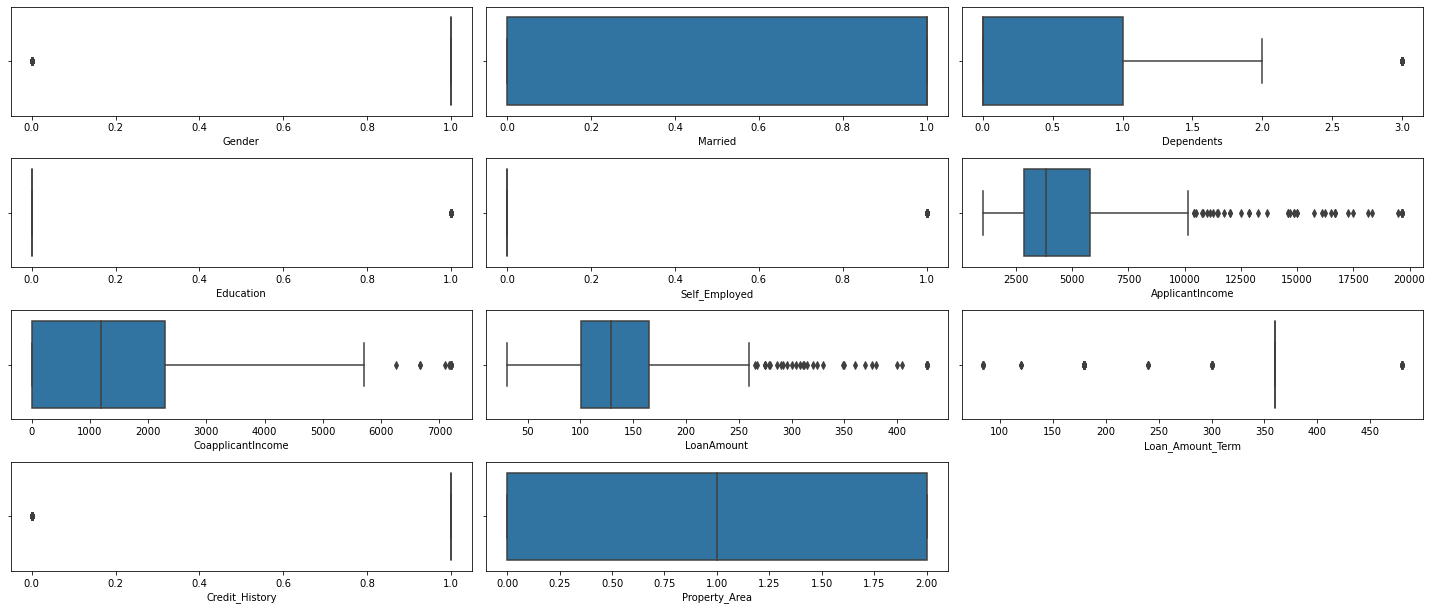

In [60]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
    plt.subplot(12,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

Outliers have been removed

<AxesSubplot:>

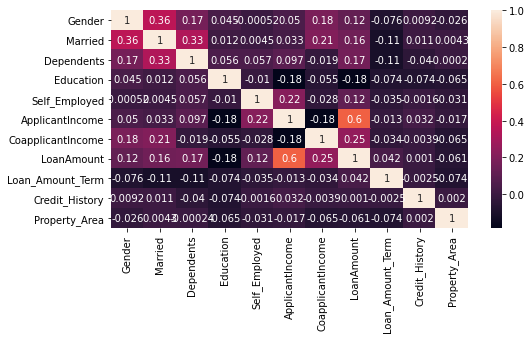

In [61]:
plt.figure(figsize=(8,4))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

From the heatmap, it can be seen that we have some columns which have good correlation like applicantincome and loanamount married and we also have some columns that have less correlation.

# Balancing the data

In [62]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Loan_Status'])

Plotting difference between imbalanced and balanced data

Text(0.5, 1.0, 'Balanced Data')

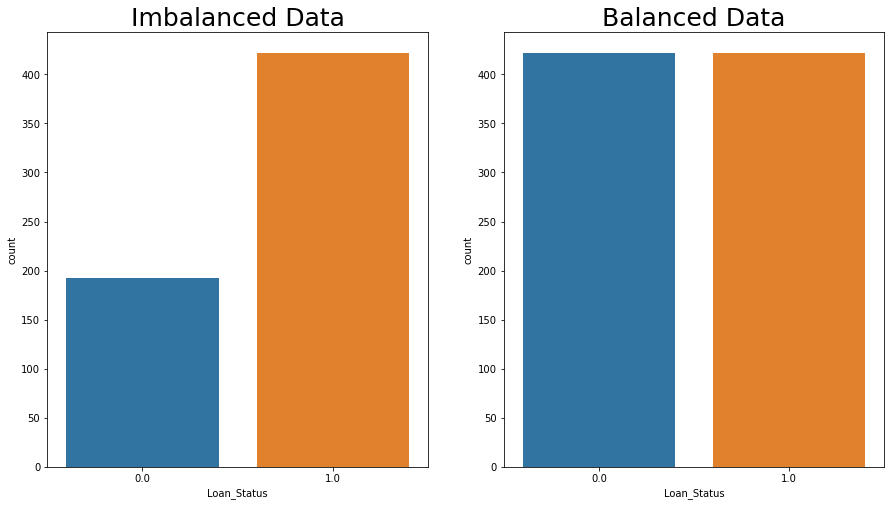

In [63]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=25)
plt.subplot(1,2,2)
sns.countplot(y_new['Loan_Status'])
plt.title("Balanced Data",fontsize=25)

# Checking skewness

In [64]:
X_new.skew()

Gender              -1.644644
Married             -0.539699
Dependents           1.188953
Education            1.232360
Self_Employed        2.189560
ApplicantIncome      2.322111
CoapplicantIncome    1.286897
LoanAmount           1.849314
Loan_Amount_Term    -2.125274
Credit_History      -1.325004
Property_Area       -0.056966
dtype: float64

# Removing Skewness

In [65]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

# After Removing Skewness

In [66]:
X_new.skew()

Gender              -1.408679
Married             -0.497079
Dependents           0.565957
Education            1.042668
Self_Employed        1.927853
ApplicantIncome     -0.016536
CoapplicantIncome   -0.090536
LoanAmount           0.002807
Loan_Amount_Term     0.395909
Credit_History      -1.135653
Property_Area       -0.151233
dtype: float64

# Feature Scaling

In [67]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

Using StandardScaler to scaler all the values in data.

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [69]:
from yellowbrick.classifier.rocauc import roc_auc

In [70]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold

In [73]:
models={
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(eval_metric='mlogloss'),
    "LIGHTGBM":LGBMClassifier()
}

*************************************************** GradientBoostingClassifier ************************************************************


Accuracy_Score 0.7952755905511811


SCORE 0.7952755905511811


Confusion metrics


[[ 93  43]
 [  9 109]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       136
         1.0       0.72      0.92      0.81       118

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.79       254
weighted avg       0.82      0.80      0.79       254

Cross_Val_Score 0.8210622710622711


ROC AUC CURVE


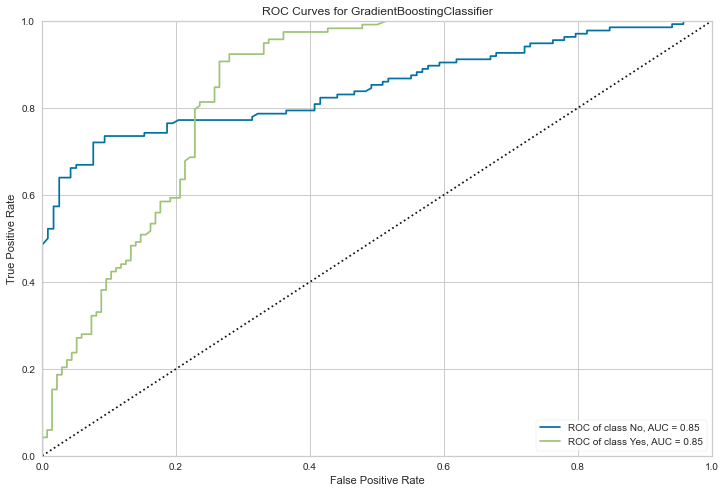

MODEL LEARNING CURVE


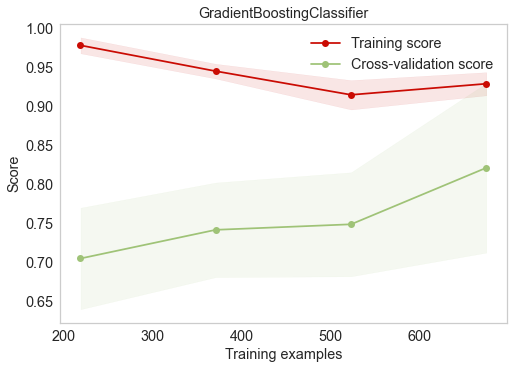

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.7952755905511811


SCORE 0.7952755905511811


Confusion metrics


[[101  35]
 [ 17 101]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80       136
         1.0       0.74      0.86      0.80       118

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254

Cross_Val_Score 0.8317483798253029


ROC AUC CURVE


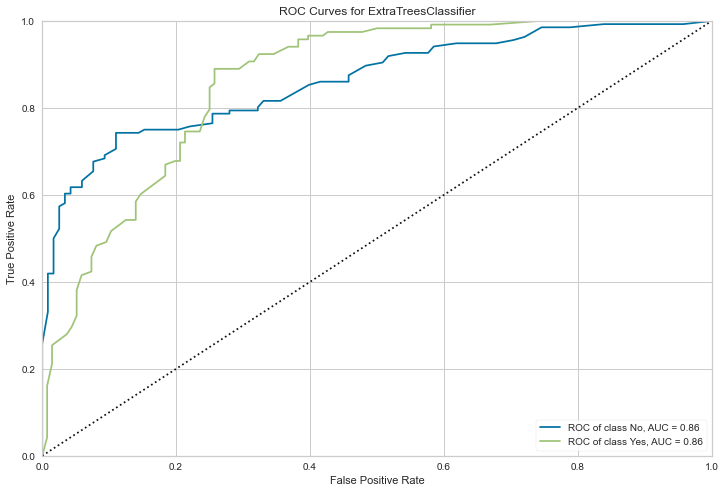

MODEL LEARNING CURVE


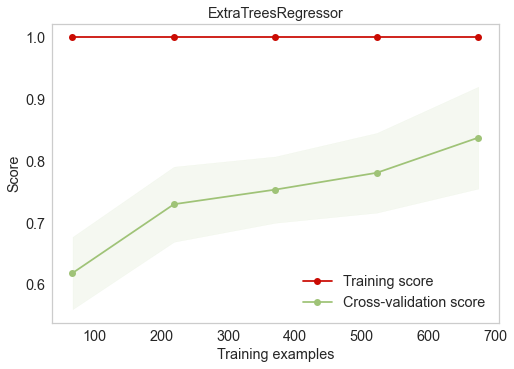

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.8228346456692913


SCORE 0.8228346456692913


Confusion metrics


[[ 99  37]
 [  8 110]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.93      0.73      0.81       136
         1.0       0.75      0.93      0.83       118

    accuracy                           0.82       254
   macro avg       0.84      0.83      0.82       254
weighted avg       0.84      0.82      0.82       254

Cross_Val_Score 0.8518808114961962


ROC AUC CURVE


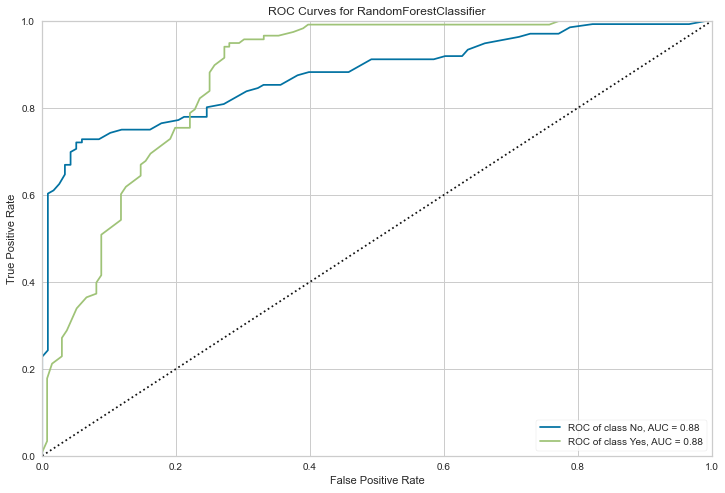

MODEL LEARNING CURVE


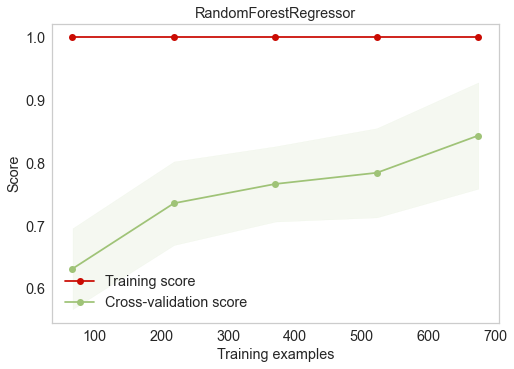

*************************************************** XGBRegressor ************************************************************


Accuracy_Score 0.8070866141732284


SCORE 0.8070866141732284


Confusion metrics


[[103  33]
 [ 16 102]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       136
         1.0       0.76      0.86      0.81       118

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254

Cross_Val_Score 0.8199070160608622


ROC AUC CURVE


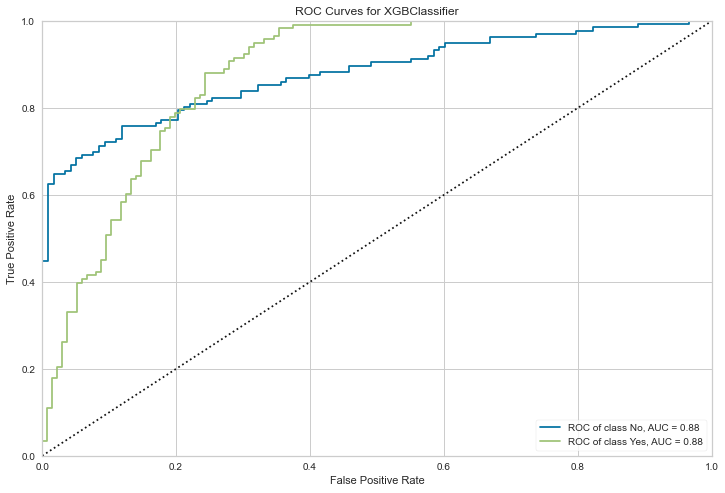

MODEL LEARNING CURVE


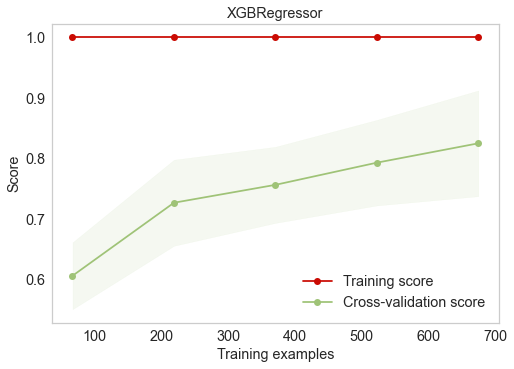

*************************************************** LIGHTGBM ************************************************************


Accuracy_Score 0.7874015748031497


SCORE 0.7874015748031497


Confusion metrics


[[ 99  37]
 [ 17 101]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79       136
         1.0       0.73      0.86      0.79       118

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.80      0.79      0.79       254

Cross_Val_Score 0.8223091011552551


ROC AUC CURVE


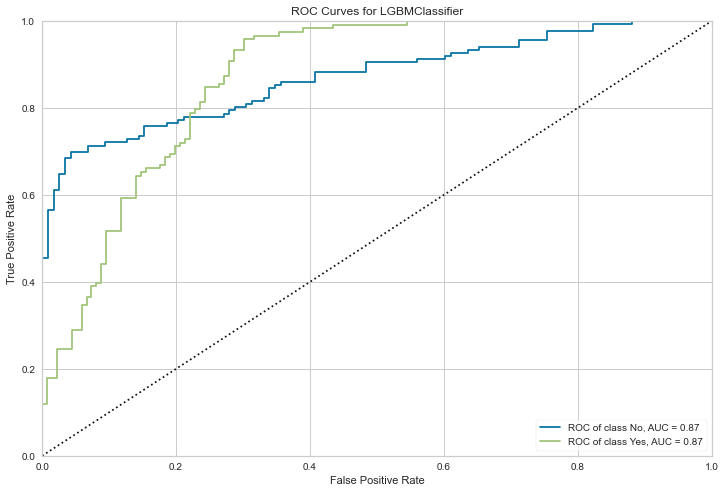

MODEL LEARNING CURVE


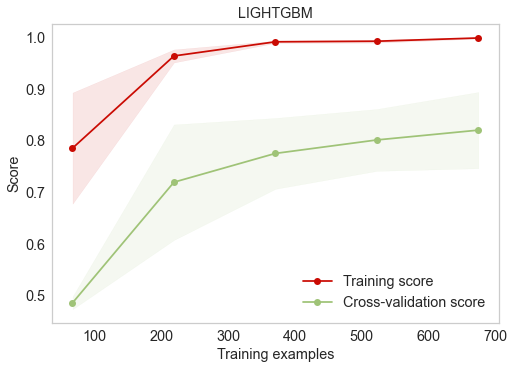

In [74]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
    print("***************************************************",name,"************************************************************")
    MODEL.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('\n')
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print('\n')
    print("SCORE",model.score(X_test,y_test))
    print("\n")
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print('\n')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print('\n')
    print(report)
    csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print('\n')
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

I will select RandomForest because it is giving me good performance metrics as compare to others.

In [75]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
param={'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]
}

In [78]:
Grid=GridSearchCV(estimator=rf,param_grid=param,cv=skf,n_jobs=-1)

In [79]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [80]:
Grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [81]:
Grid.best_score_

0.8471682163989855

Accuracy increased from 82.28 to 84.71

Now i'll put all the values of grid in RandomForest to plot roc_auc and see learnign curve and matrics

In [84]:
RF=RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_depth= None,
 max_features= 'sqrt',
 max_samples= None,
 min_samples_leaf= 2,
 min_samples_split= 2)

ROC AUC CURVE


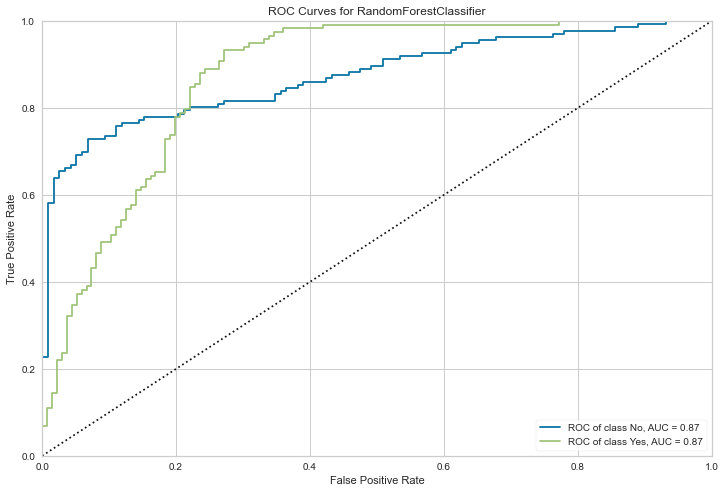

MODEL LEARNING CURVE


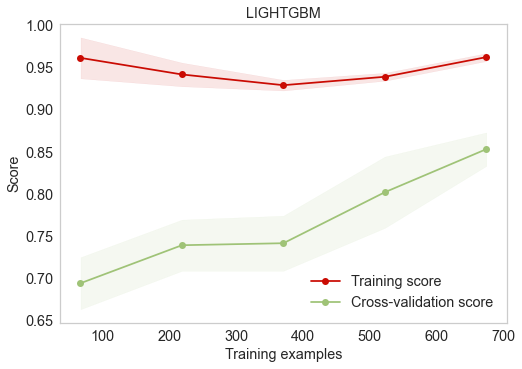

In [85]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(RF,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(RF,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

# Final Model Matrics

In [86]:
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print("Confusion Matrics")
print('\n')
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Accuracy_score 0.8110236220472441
Confusion Matrics


[[ 95  41]
 [  7 111]]
Classification Report


              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80       136
         1.0       0.73      0.94      0.82       118

    accuracy                           0.81       254
   macro avg       0.83      0.82      0.81       254
weighted avg       0.84      0.81      0.81       254



In [87]:
import joblib
joblib.dump(Grid,'Classifier.obj')

['Classifier.obj']

In [89]:
model=joblib.load('Classifier.obj')

In [90]:
model.predict(X_test)

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1.

# Conclusion

1. In this data i have to make a model that can predict the loan status (Approve or Disapprove).

2. Did EDA to understand the effect of features on my target column and to analyse multiple things.

3. The data was imbalanced, so balanced it by using upsampling smote.

4. The dataset is very small, so the machine learnings got affected. If the data was larger, model could learn more and accuracy may be increased.

5. Finally, build a model that can predict loan status with 84% accuracy.